# End to End Simple ML with Data Preparation on Gender Classification Dataset from Kaggle

Using simple machine learning on the [Gender Classification Dataset](https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset) by **JIFRY ISSADEEN** on Kaggle.


**About Dataset**

**Context**


While I was practicing machine learning, I wanted to create a simple dataset that is closely aligned to the real world scenario and gives better results to whet my appetite on this domain. If you are a beginner who wants to try solving classification problems in machine learning and if you prefer achieving better results, try using this dataset in your projects which will be a great place to start.


**Content**

This dataset contains 7 features and a label column.

longhair - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".
foreheadwidthcm - This column is in CM's. This is the width of the forehead.
foreheadheightcm - This is the height of the forehead and it's in Cm's.
nosewide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".
noselong - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".
lipsthin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".
distancenosetoliplong - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".

gender - This is either "Male" or "Female".


**Acknowledgements**


Nothing to acknowledge as this is just a made up data.


**Inspiration**


It's painful to see bad results at the beginning. Don't begin with complicated datasets if you are a beginner. I'm sure that this dataset will encourage you to proceed further in the domain. Good luck.

### Adding Data

In [0]:
import pandas as pd


file = "/dbfs/FileStore/dbfs/gender_classification_v7.csv"
dataframe = pd.read_csv(file)


In [0]:
dataframe.head()

Out[2]:

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


###Data Visualization
Before training a model, explore the dataset using Seaborn and Matplotlib.

In [0]:
dataframe.describe().T.style.background_gradient(cmap = 'Spectral')

Out[3]:

,count,mean,std,min,25%,50%,75%,max
long_hair,5001.000000,0.869626,0.336748,0.000000,1.000000,1.000000,1.000000,1.000000
forehead_width_cm,5001.000000,13.181484,1.107128,11.400000,12.200000,13.100000,14.000000,15.500000
forehead_height_cm,5001.000000,5.946311,0.541268,5.100000,5.500000,5.900000,6.400000,7.100000
nose_wide,5001.000000,0.493901,0.500013,0.000000,0.000000,0.000000,1.000000,1.000000
nose_long,5001.000000,0.507898,0.499988,0.000000,0.000000,1.000000,1.000000,1.000000
lips_thin,5001.000000,0.493101,0.500002,0.000000,0.000000,0.000000,1.000000,1.000000
distance_nose_to_lip_long,5001.000000,0.498900,0.500049,0.000000,0.000000,0.000000,1.000000,1.000000


In [0]:
dataframe.columns

Out[4]: Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
 'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
 dtype='object')

In [0]:
dataframe.dtypes

Out[5]: long_hair int64
forehead_width_cm float64
forehead_height_cm float64
nose_wide int64
nose_long int64
lips_thin int64
distance_nose_to_lip_long int64
gender object
dtype: object

In [0]:
males = (dataframe.gender == 'Male').astype(bool).astype(int)
males_df = dataframe
males_df.gender = males

Out[36]:

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


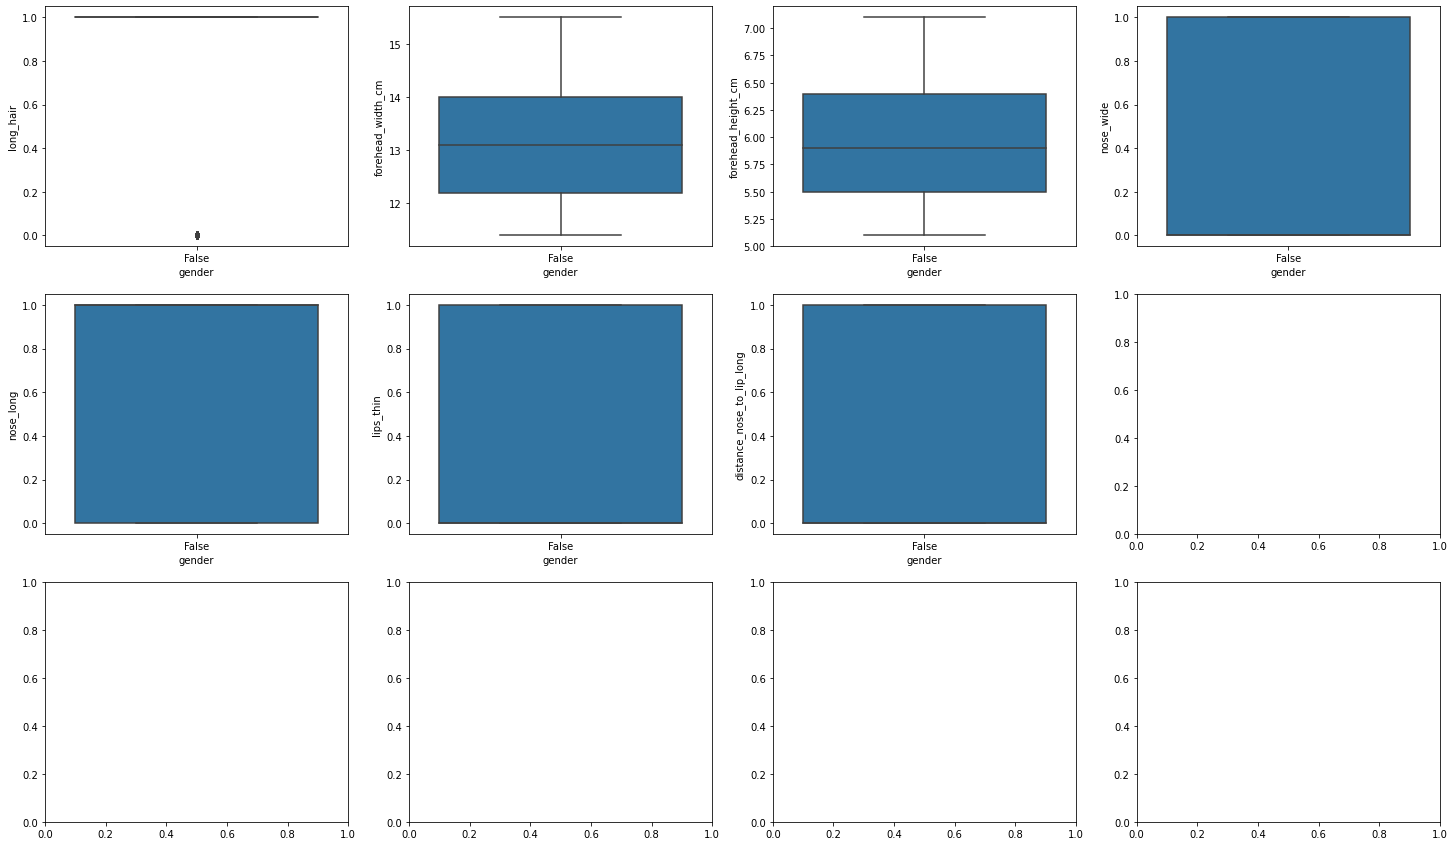

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

dims = (3, 4)
 
f, axes = plt.subplots(dims[0], dims[1], figsize=(25, 15))
axis_i, axis_j = 0, 0
for col in males_df.columns:
    if col == 'gender':
        continue # Box plots cannot be used on indicator variables
    sns.boxplot(x=males, y=males_df[col], ax=axes[axis_i, axis_j])
    axis_j += 1
    if axis_j == dims[1]:
        axis_i += 1
        axis_j = 0

### Preprocessing Data
Prior to training a model, check for missing values and split the data into training and validation sets.

In [0]:
dataframe.isna().any()

Out[8]: long_hair False
forehead_width_cm False
forehead_height_cm False
nose_wide False
nose_long False
lips_thin False
distance_nose_to_lip_long False
gender False
dtype: bool

In [0]:
from sklearn.model_selection import train_test_split
 
train, test = train_test_split(dataframe, random_state=123)
X_train = train.drop(["gender"], axis=1)
X_test = test.drop(["gender"], axis=1)
y_train = train.gender
y_test = test.gender

In [0]:
X_train.head()

Out[14]:

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
1471,1,11.7,7.0,0,1,1,1
1196,1,14.3,6.5,1,1,1,1
1509,0,13.7,5.9,0,0,0,0
4111,1,12.5,5.7,0,0,0,0
3704,1,12.8,6.4,0,0,0,0


### Building a Baseline Model
This task seems well suited to a random forest classifier, since the output is binary and there may be interactions between multiple variables.

In [0]:
!pip install mlflow

Requirement already satisfied: mlflow in /local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.8/site-packages (1.30.0)
Requirement already satisfied: cloudpickle<3 in /local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.8/site-packages (from mlflow) (2.2.0)
Requirement already satisfied: databricks-cli<1,>=0.8.7 in /local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.8/site-packages (from mlflow) (0.17.3)
Requirement already satisfied: click<9,>=7.0 in /local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.8/site-packages (from mlflow) (8.1.3)
Requirement already satisfied: pytz<2023 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (2020.5)
Requirement already satisfied: sqlparse<1,>=0.4.0 in /local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.8/site-packages (from mlflow) (0.4.3)
Requirement already satisfied: entrypoints<1 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (0.3)
Requirement already satisfied: requests<3,>=2.17.3 in /local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.8/site-packages (from mlflow) (2.28.1)
Requirement already satisfied: numpy<2 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.20.1)
Requirement already satisfied: pandas<2 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.2.4)
Requirement already satisfied: docker<7,>=4.0.0 in /local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.8/site-packages (from mlflow) (6.0.0)
Requirement already satisfied: importlib-metadata!=4.7.0,<6,>=3.7.0 in /local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.8/site-packages (from mlflow) (5.0.0)
Requirement already satisfied: protobuf<5,>=3.12.0 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (3.17.2)
Requirement already satisfied: prometheus-flask-exporter<1 in /local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.8/site-packages (from mlflow) (0.20.3)
Requirement already satisfied: pyyaml<7,>=5.1 in /local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.8/site-packages (from mlflow) (6.0)
Requirement already satisfied: alembic<2 in /local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.8/site-packages (from mlflow) (1.8.1)
Requirement already satisfied: gitpython<4,>=2.1.0 in /local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.8/site-packages (from mlflow) (3.1.29)
Requirement already satisfied: scipy<2 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.6.2)
Requirement already satisfied: sqlalchemy<2,>=1.4.0 in /local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.8/site-packages (from mlflow) (1.4.42)
Requirement already satisfied: gunicorn<21 in /local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.8/site-packages (from mlflow) (20.1.0)
Requirement already satisfied: packaging<22 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (20.9)
Requirement already satisfied: Flask<3 in /local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.8/site-packages (from mlflow) (2.2.2)
Requirement already satisfied: querystring-parser<2 in /local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.8/site-packages (from mlflow) (1.2.4)
Requirement already satisfied: importlib-resources in /local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.8/site-packages (from alembic<2->mlflow) (5.10.0)
Requirement already satisfied: Mako in /local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.8/site-packages (from alembic<2->mlflow) (1.2.3)
Requirement already satisfied: oauthlib>=3.1.0 in /local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.8/site-packages (from databricks-cli<1,>=0.8.7->mlflow) (3.2.2)
Requirement already satisfied: six>=1.10.0 in /databricks/python3/lib/python3.8/site-packages (from databricks-cli<1,>=0.8.7->mlflow) (1.15.0)
Requirement already satisfied: pyjwt>=1.7.0 in /

In [0]:
import mlflow
import mlflow.pyfunc
import mlflow.sklearn
import numpy as np
mlflow.set_tracking_uri('databricks')

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlflow.models.signature import infer_signature
 
class SklearnModelWrapper(mlflow.pyfunc.PythonModel):
    def __init__(self, model):
        self.model = model

    def predict(self, context, model_input):
        return self.model.predict_proba(model_input)[:,1]


with mlflow.start_run(run_name='untuned_random_forest'):
    n_estimators = 10
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=np.random.RandomState(123))
    model.fit(X_train, y_train)


    predictions_test = model.predict_proba(X_test)[:,1]
    auc_score = roc_auc_score(y_test, predictions_test)
    mlflow.log_param('n_estimators', n_estimators)

    mlflow.log_metric('auc', auc_score)
    wrappedModel = SklearnModelWrapper(model)


    signature = infer_signature(X_train, wrappedModel.predict(None, X_train))
    mlflow.pyfunc.log_model("random_forest_model", python_model=wrappedModel, signature=signature)

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.8/site-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
 inputs = _infer_schema(model_input)

In [0]:
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns.tolist(), columns=['importance'])
feature_importances.sort_values('importance', ascending=False)

Out[39]:

,importance
nose_wide,0.240877
lips_thin,0.223136
nose_long,0.219398
distance_nose_to_lip_long,0.137617
forehead_width_cm,0.098557
forehead_height_cm,0.076750
long_hair,0.003665


### Registering the model in the MLflow Model Registry

In [0]:
run_id = mlflow.search_runs(filter_string='tags.mlflow.runName = "untuned_random_forest"').iloc[0].run_id

In [0]:
model_name = "GenderDetection"
model_version = mlflow.register_model(f"runs:/{run_id}/random_forest_model", model_name)

Successfully registered model 'GenderDetection'.
2022/10/29 11:54:54 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: GenderDetection, version 1
Created version '1' of model 'GenderDetection'.

In [0]:
model_version

Out[42]: <ModelVersion: creation_timestamp=1667044494109, current_stage='None', description='', last_updated_timestamp=1667044497049, name='GenderDetection', run_id='482012be60604c019d5f389de9274f02', run_link='', source='dbfs:/databricks/mlflow-tracking/1250308448975204/482012be60604c019d5f389de9274f02/artifacts/random_forest_model', status='READY', status_message='', tags={}, user_id='soumyendra.shrivastava@sjsu.edu', version='1'>

In [0]:
from mlflow.tracking import MlflowClient
 
client = MlflowClient()
client.transition_model_version_stage(
  name=model_name,
  version=model_version.version,
  stage="Production",
)


Out[43]: <ModelVersion: creation_timestamp=1667044494109, current_stage='Production', description='', last_updated_timestamp=1667044529533, name='GenderDetection', run_id='482012be60604c019d5f389de9274f02', run_link='', source='dbfs:/databricks/mlflow-tracking/1250308448975204/482012be60604c019d5f389de9274f02/artifacts/random_forest_model', status='READY', status_message='', tags={}, user_id='1074775817008887', version='1'>

In [0]:
best_run = mlflow.search_runs(order_by=['metrics.auc DESC']).iloc[0]
print(f'AUC of Best Run: {best_run["metrics.auc"]}')

AUC of Best Run: 0.9915461965560475